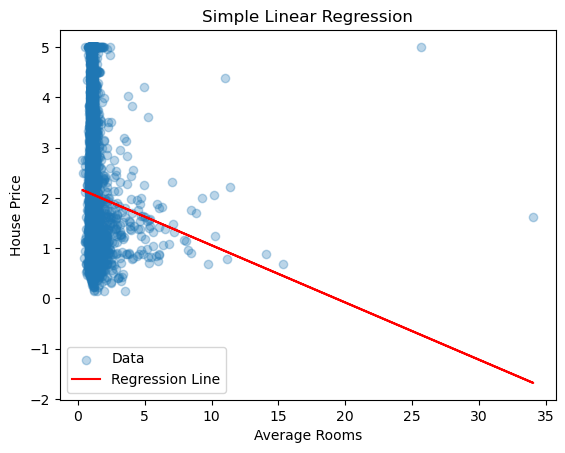

In [1]:
# Part I: Linear Regression
# Task 1: Simple Linear Regression


from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


data = fetch_california_housing()
X = data.data[:, [3]]  
y = data.target

lr = LinearRegression()
lr.fit(X, y)

coef = lr.coef_[0]
intercept = lr.intercept_


plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, lr.predict(X), color='red', label="Regression Line")
plt.xlabel("Average Rooms")
plt.ylabel("House Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()




In [2]:
# Task 2: Multiple Linear Regression

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


features = ['AveRooms', 'AveBedrms', 'Population', 'MedInc']
feature_idx = [data.feature_names.index(f) for f in features]
X_multi = data.data[:, feature_idx]


lr_multi = LinearRegression()
lr_multi.fit(X_multi, y)


y_pred = lr_multi.predict(X_multi)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)


for f, c in zip(features, lr_multi.coef_):
    print(f"{f}: {c:.4f}")
print(f"R²: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")



AveRooms: -0.2386
AveBedrms: 1.0698
Population: -0.0000
MedInc: 0.5362
R²: 0.5101, MSE: 0.6524, RMSE: 0.8077


In [3]:
# Task 3: Feature Scaling and Normalization

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)


lr_scaled = LinearRegression()
lr_scaled.fit(X_scaled, y)
y_pred_scaled = lr_scaled.predict(X_scaled)

r2_scaled = r2_score(y, y_pred_scaled)
mse_scaled = mean_squared_error(y, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print(f"R² before: {r2:.4f}, after: {r2_scaled:.4f}")
print(f"RMSE before: {rmse:.4f}, after: {rmse_scaled:.4f}")


R² before: 0.5101, after: 0.5101
RMSE before: 0.8077, after: 0.8077


C:\Users\Rishabh Sengar\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


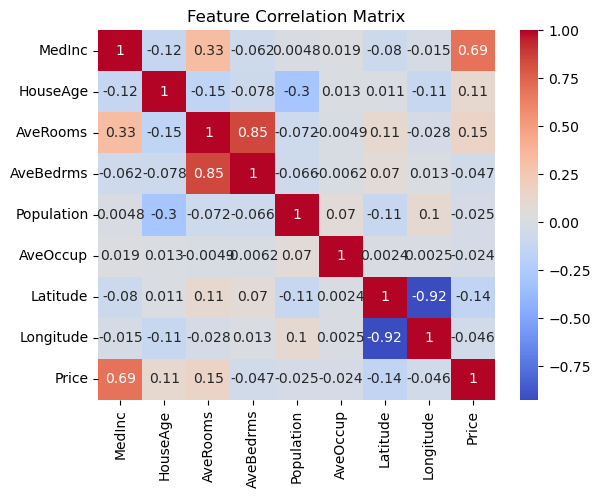

In [4]:
# Task 4: Model Interpretation

import pandas as pd
import seaborn as sns


df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target


corr = df.corr()


sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [5]:
# Task 5: Binary Classification with Logistic Regression

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

clf = LogisticRegression(max_iter=10000)
clf.fit(X_cancer, y_cancer)
y_pred = clf.predict(X_cancer)
y_prob = clf.predict_proba(X_cancer)[:,1]

acc = accuracy_score(y_cancer, y_pred)
cm = confusion_matrix(y_cancer, y_pred)
precision = precision_score(y_cancer, y_pred)
recall = recall_score(y_cancer, y_pred)
f1 = f1_score(y_cancer, y_pred)
roc_auc = roc_auc_score(y_cancer, y_prob)

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9578, Precision: 0.9587, Recall: 0.9748, F1: 0.9667, ROC-AUC: 0.9947
Confusion Matrix:
[[197  15]
 [  9 348]]


Threshold: 0.3, F1-score: 0.9657
Confusion Matrix:
[[192  20]
 [  5 352]]
Threshold: 0.5, F1-score: 0.9667
Confusion Matrix:
[[197  15]
 [  9 348]]
Threshold: 0.7, F1-score: 0.9673
Confusion Matrix:
[[206   6]
 [ 17 340]]


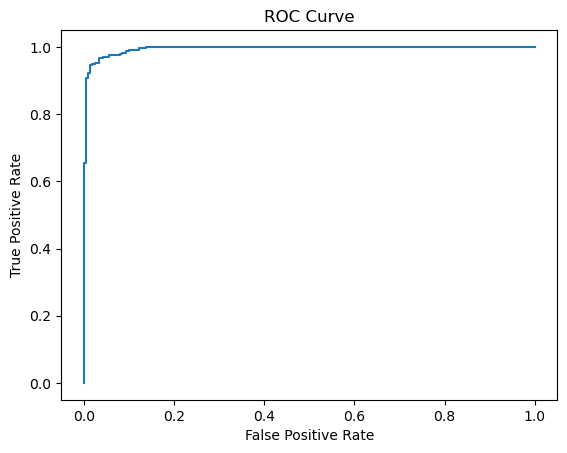

In [6]:
# Task 6: Threshold Tuning and Probability Interpretation

import matplotlib.pyplot as plt


for threshold in [0.3, 0.5, 0.7]:
    y_pred_th = (y_prob >= threshold).astype(int)
    cm_th = confusion_matrix(y_cancer, y_pred_th)
    f1_th = f1_score(y_cancer, y_pred_th)
    print(f"Threshold: {threshold}, F1-score: {f1_th:.4f}")
    print("Confusion Matrix:")
    print(cm_th)

fpr, tpr, _ = roc_curve(y_cancer, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()


In [7]:
# Task 7 (Optional): Multiclass Classification

from sklearn.datasets import load_iris
from sklearn.metrics import classification_report


iris = load_iris()
X_iris = iris.data
y_iris = iris.target

clf_iris = LogisticRegression(multi_class='ovr', max_iter=10000)
clf_iris.fit(X_iris, y_iris)
y_pred_iris = clf_iris.predict(X_iris)

print(classification_report(y_iris, y_pred_iris))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.90      0.93        50
           2       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [ ]:
1. What are the assumptions of linear regression?

Linear relationship between independent and dependent variables.

Independence of errors (no correlation in residuals).

Homoscedasticity (constant variance of errors).

Normal distribution of errors.

No multicollinearity (independent variables should not be highly correlated).

In [ ]:
2. When should you use logistic regression instead of linear regression?
Use logistic regression when the dependent variable is categorical, especially binary (e.g., yes/no, 0/1), rather than continuous. It models the probability of class membership

In [ ]:
3. What is the interpretation of coefficients in logistic regression?
Each coefficient represents the change in the log-odds of the dependent variable being 1 for a one-unit increase in the corresponding independent variable, holding others constant. Exponentiating the coefficient gives the odds ratio.

In [ ]:
4. What is the difference between sigmoid and softmax functions?

The sigmoid function maps input to a probability between 0 and 1 and is used for binary classification.

The softmax function generalizes sigmoid to multi-class classification, outputting a probability distribution over multiple classes that sums to 1.

In [ ]:
5. Why is R-squared not suitable for evaluating logistic regression models?
R-squared is designed for linear regression with continuous outcomes and doesn’t measure goodness-of-fit well for categorical outcomes. Logistic regression uses metrics like log-loss, AUC, or pseudo R-squared (e.g., McFadden’s R²) instead.